This notebook demonstrates downloading triggered waveforms as ObsPy streams with the pystp module. 

First, import the STPClient class and connect to STP.

In [1]:
from pystp import STPClient

%matplotlib inline

In [2]:
stp = STPClient('lefroy.gps.caltech.edu', 9999)

In [3]:
stp.connect()

	****************************************
	*   Welcome to the Southern California *
	*      Earthquake Data Center          *
	*     Seismic Transfer Program         *
        ****************************************

Please use the following citation:
 SCEDC (2013): Southern California Earthquake Data Center.
 Caltech.Dataset. doi:10.7909/C3WD3xH
to cite data downloaded from the SCEDC.

IMPORTANT : Waveforms for continuous data requests downloaded between  March 3rd 2017 13:00:00 PST to March 7th 2017 14:00 PST are shifted by 1 second due to a bug in our archival. The issue has been fixed. Please re-run your requests made between those dates. Triggered data was not affected.




# Downloading an ObsPy Stream

The 'get_trig' method downloads the waveforms of an event and either returns the waveforms as an ObsPy stream or leaves them on disk. Search parameters of net, sta, chan, and loc (location code) can be specified to only download data from certain stations or channels. "Blank blank" location codes should be passed in as "--". 

The next command downloads all waveforms for event 38904823 and returns them as an ObsPy stream. 

In [4]:
waveforms = stp.get_trig([38904823])

Processed 1831 waveform traces


In [5]:
waveforms

1831 Trace(s) in Stream:

CI.CLC..BHE | 2019-10-17T19:28:55.521862Z - 2019-10-17T19:30:22.071862Z | 40.0 Hz, 3463 samples
...
(1829 other traces)
...
PB.B093..EHZ | 2019-10-17T19:29:29.968302Z - 2019-10-17T19:30:57.098302Z | 100.0 Hz, 8714 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

ObsPy stream methods can be used to select traces from the stream and to do processing and plotting. The following line returns a new Stream that only contains data from the CI network.

In [6]:
waveforms.select(network='CI')

1594 Trace(s) in Stream:

CI.CLC..BHE | 2019-10-17T19:28:55.521862Z - 2019-10-17T19:30:22.071862Z | 40.0 Hz, 3463 samples
...
(1592 other traces)
...
CI.CSH..HHZ | 2019-10-17T19:29:35.013131Z - 2019-10-17T19:30:55.723131Z | 100.0 Hz, 8072 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

The next command plots data from CI.CLC.

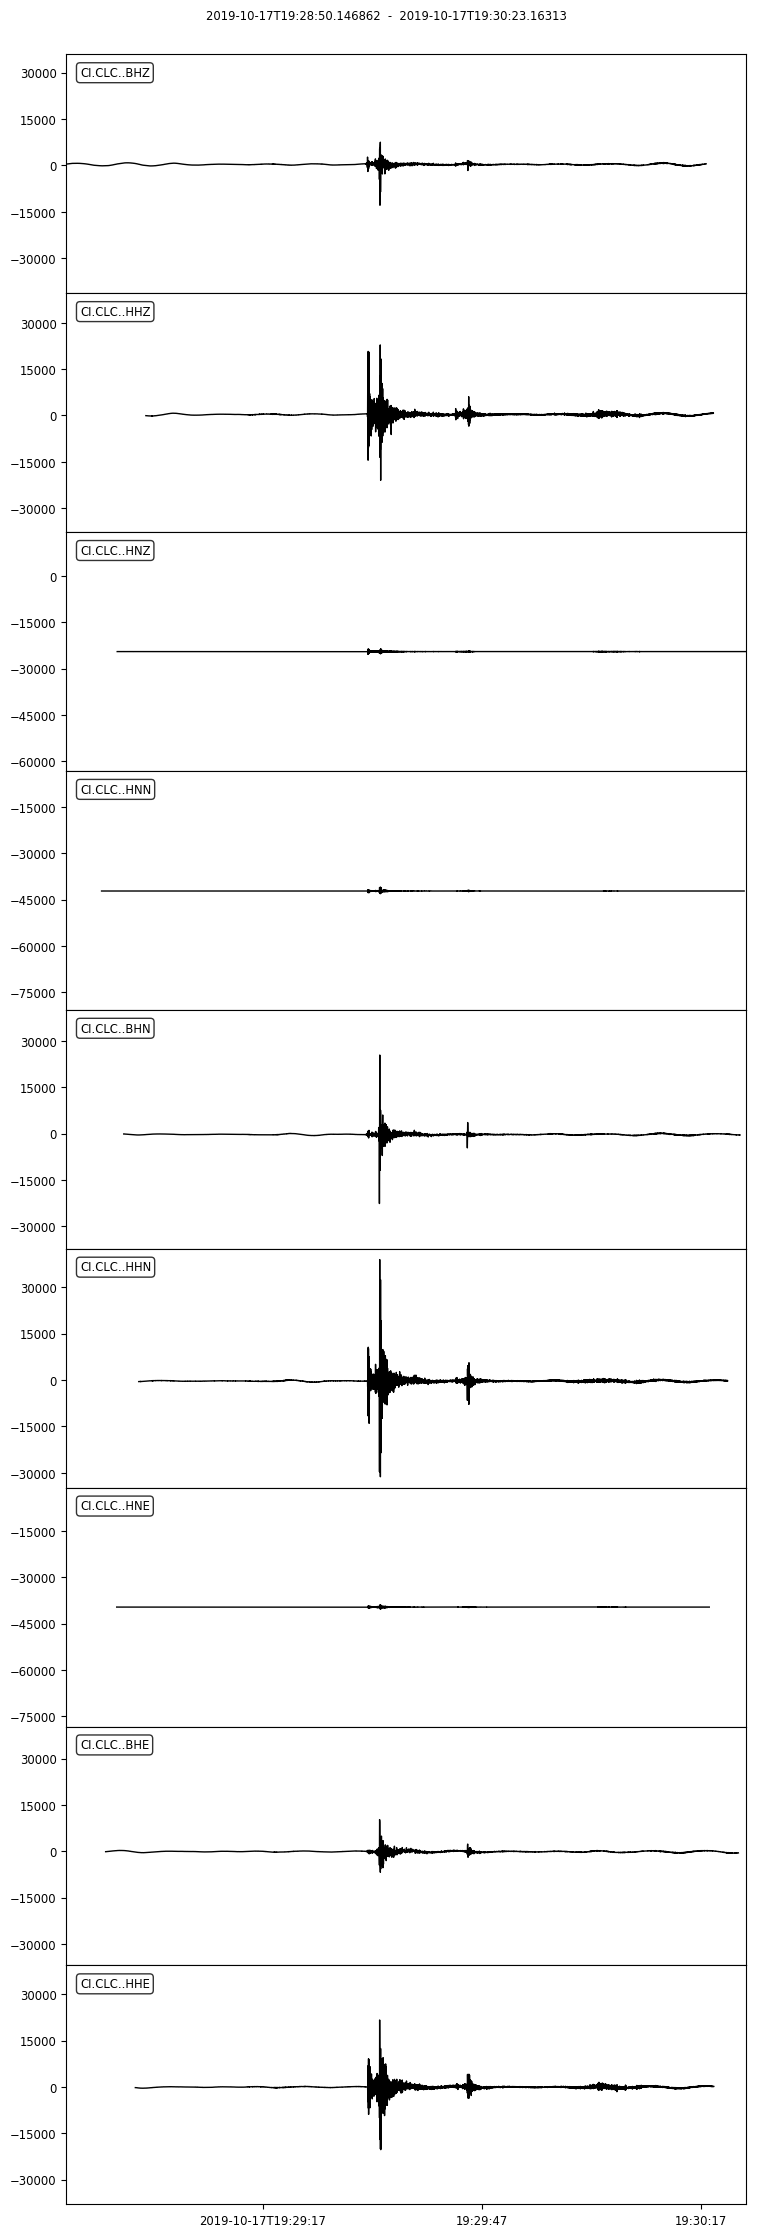

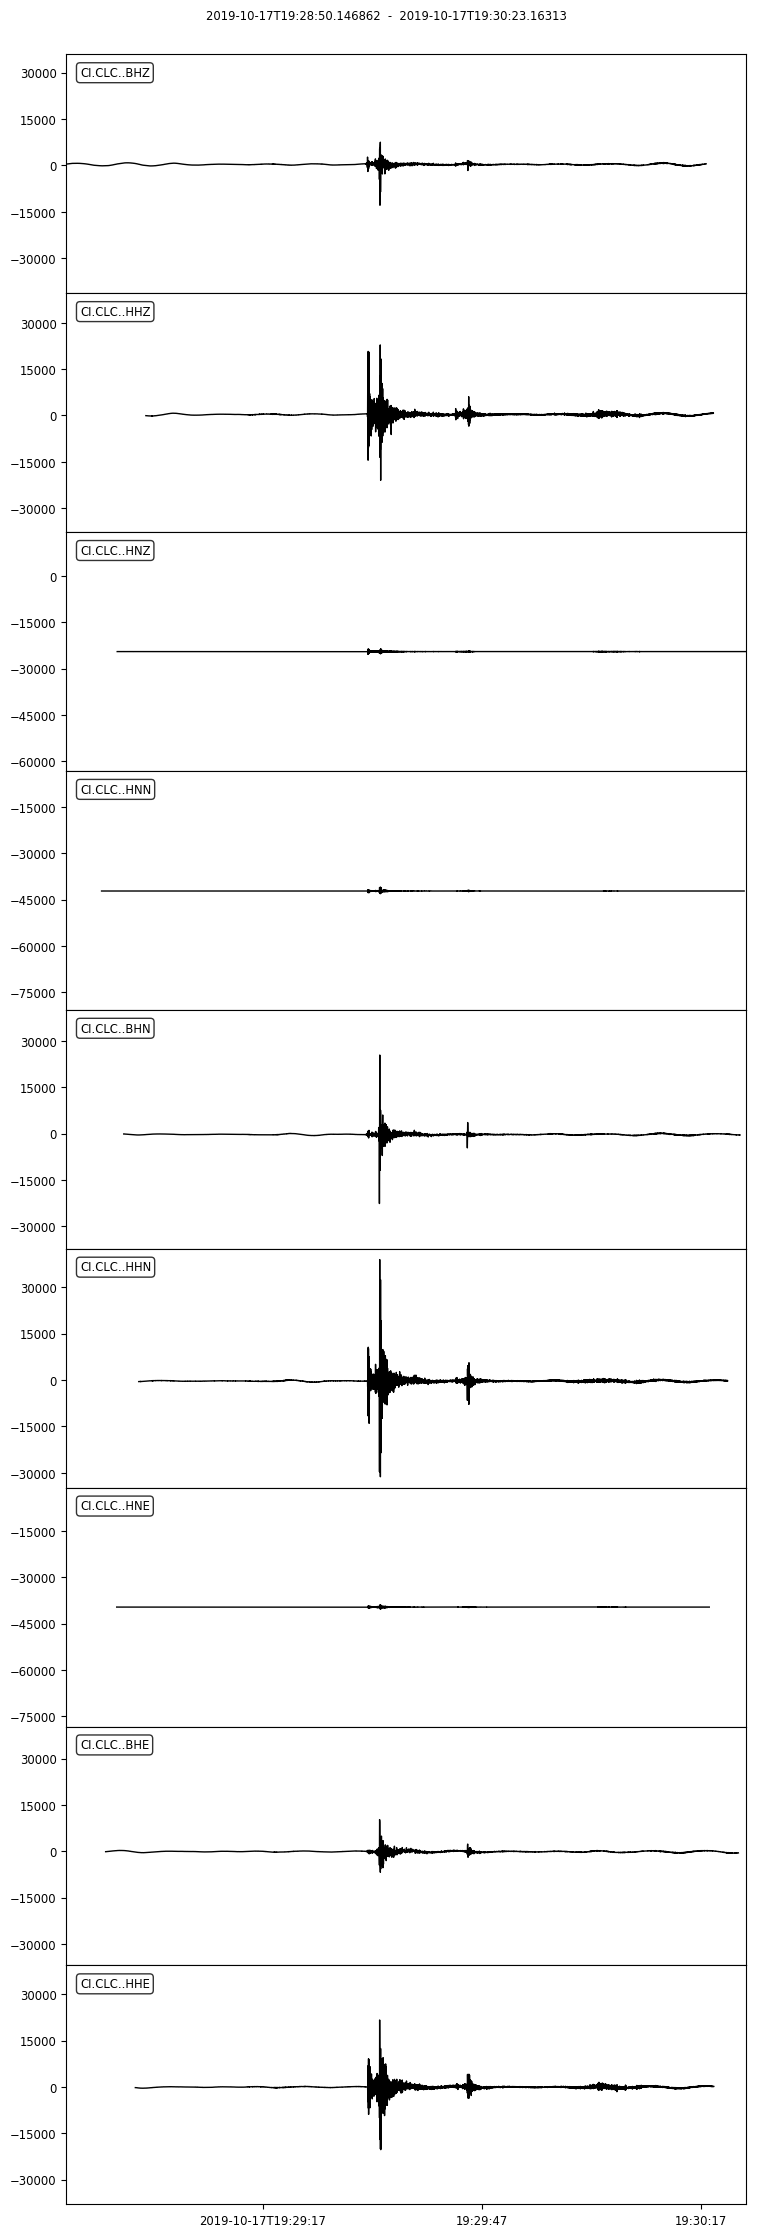

In [7]:
waveforms.select(network='CI', station='CLC').plot()

'get_trig' can filter waveforms by network, station, location code, channel, and radius from events.

When you are done, disconnect from the STP server.

In [8]:
stp.disconnect()